In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
listnames = ['Michigan','Region1','Region2N','Region2S','Region3','Region5','Region6','Region7','Region8']
cases = pd.read_excel('Michigan.xlsx',sheet_name=None)
dates = cases['Region2N']['Date'].unique()

#dates = cases['date'].unique()
values = np.nan*np.zeros((len(listnames),len(dates),2))
days = np.nan*np.zeros((len(listnames),len(dates),2))
region = np.nan*np.zeros((len(listnames),len(dates),2))
for l in range(len(listnames)):
    for d in range(len(dates)):
        date = dates[d]
        days[:,d,:] = d
        region[l,d,:] = l
        current_sheet =      cases[listnames[l]]               
        cases_day = current_sheet[current_sheet['Date']==date]['Positive Tests'].tolist()
        tests_day = current_sheet[current_sheet['Date']==date]['Total Tests'].tolist()

        values[l,d,1]=cases_day[0]
        values[l,d,0]=tests_day[0]
    #print(tests_day_country)

#     for i in range(len(tests_day_country)):
        
#         count = np.where(countries_unique==tests_day_country[i])[0]
#         #print(count)
#         if(len(count)>0):
#             values[d,0,count[0]] = tests_day[i]
#     for i in range(len(countries_unique)):
#         values[d,1,i] = cases_day[countries_unique[i]]/1000

/Users/gonzalomena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


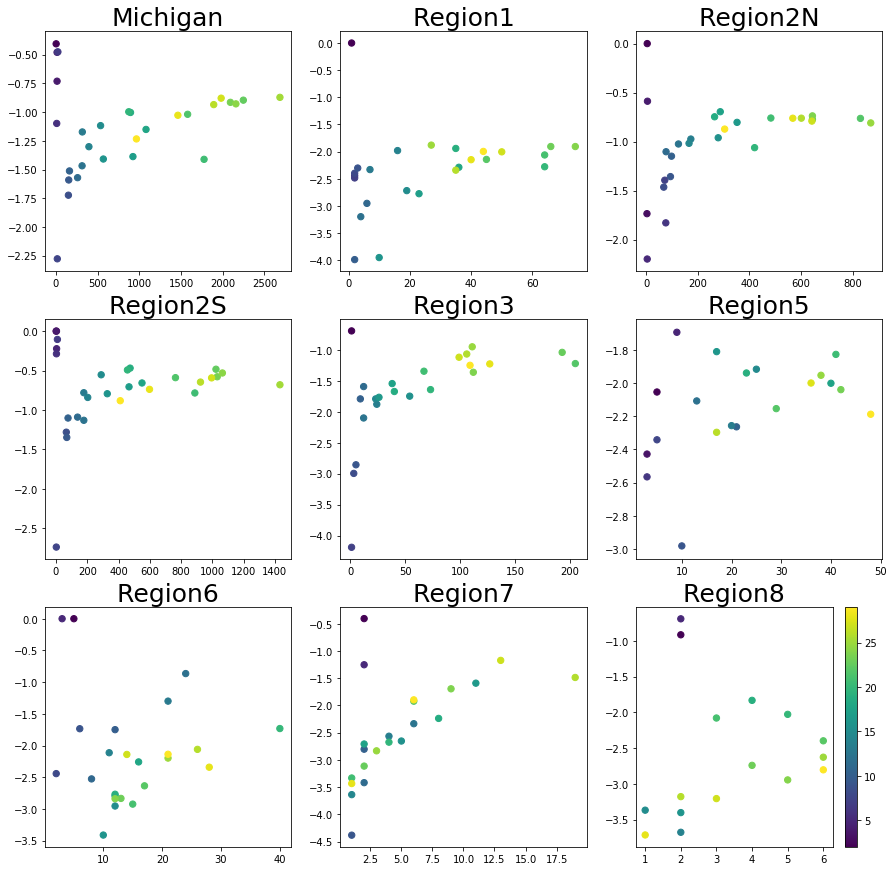

In [86]:
fig,ax = plt.subplots(3,3, figsize=(15,15))
ax=ax.flatten()
for l in range(len(listnames)):
    im =ax[l].scatter(values[l,:,1],np.log(values[l,:,1]/values[l,:,0]),40,days[l,:,0])
    ax[l].set_title(listnames[l],fontsize=25)
fig.colorbar(im, ax=ax[-1])
plt.savefig('michigan_regions.png')

/Users/gonzalomena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/Users/gonzalomena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


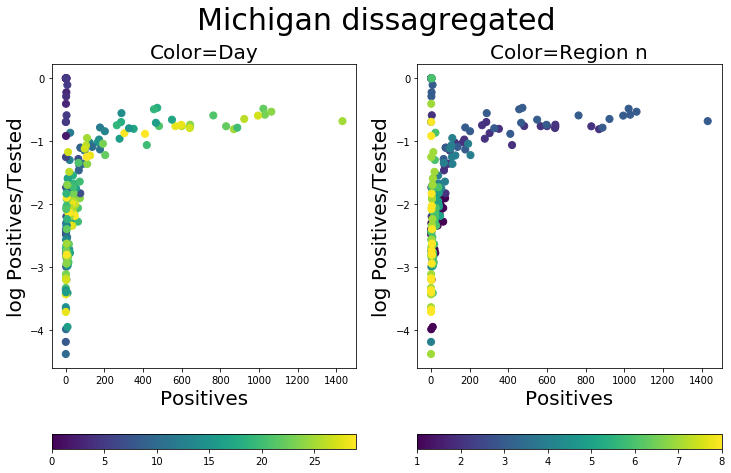

In [87]:
val2 = values[1:,:,:]
b = val2[:,:,1][:]
c = val2[:,:,0][:]
da = days[1:,:,0][:]
re = region[1:,:,0][:]
fig,ax = plt.subplots(1,2,figsize=(12,8))
im=ax[0].scatter(b, np.log(b/c),50,da)
ax[0].set_xlabel('Positives',fontsize=20)
ax[0].set_ylabel('log Positives/Tested',fontsize=20)
ax[0].set_title('Color=Day',fontsize=20)
fig.suptitle('Michigan dissagregated',fontsize=30)
fig.colorbar(im, ax=ax[0],orientation='horizontal')
im=ax[1].scatter(b, np.log(b/c),50,re)
ax[1].set_xlabel('Positives',fontsize=20)
ax[1].set_ylabel('log Positives/Tested',fontsize=20)
ax[1].set_title('Color=Region n',fontsize=20)
fig.colorbar(im, ax=ax[1],orientation='horizontal')
plt.savefig('michigandis.png')